<h1 align="center">EJERCICIO VOLUNTARIO</h1>
<br>
<h4 align="right">Armando Olivares<h4>

<div align="justify">El fichero tweets.json contiene alrededor de 8.000 tweets. Si quieres analizar detenidamente la estructura de ellos, puedes abrir el fichero un_tweet.json, que pesa bastante menos. El objetivo fundamental de este ejercicio es que aprendas a procesar ficheros de este tipo, limpiarlos y cargarlos en tablas de R o Python, con lo que luego te servirán para entrenar modelos, realizar visualizaciones y, en definitiva, generar conocimiento.</div>

#### Preparación  y carga de los datos

In [1]:
# Importamos los paquetes necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import tweepy
import json
import seaborn as sns


In [2]:
# Leemos el set de datos
with open("tweets.json", "r",  encoding='utf-8') as file:
    data = json.load(file)
(data[0])


{'contributors': None,
 'coordinates': None,
 'created_at': 'Mon Nov 14 15:00:08 +0000 2016',
 'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 798178710528503809,
 'id_str': '798178710528503809',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'es',
 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'text': 'Messi se iría del Barcelona..es como imaginarme a homero irse de los simpson..sabemos q no va a pasar..',
 'truncated': False,
 'user': {'contributors_enabled': False,
  'created_at': 'Sat Feb 22 08:08:33 +0000 2014',
  'default_profile': True,
  'default_profile_imag


Después de haber leído nuestros datos correctamente es hora de limpiarlos, ordenarlos y colocarlos en un formato más estructurado, para ello normalizamos los tweets a un dataframe valiéndonos de la función _json_normalize de pandas.

In [3]:
tweets_df= json_normalize(data)
tweets_df.shape

(7956, 174)

Como se observa se nos ha creado un dataframe de tamaño **7956 x 174**, es decir 7956 tweets 

In [4]:
tweets_df.head()

,contributors,coordinates,coordinates.coordinates,coordinates.type,created_at,entities.hashtags,entities.media,entities.symbols,entities.urls,entities.user_mentions,...,user.profile_text_color,user.profile_use_background_image,user.protected,user.screen_name,user.statuses_count,user.time_zone,user.translator_type,user.url,user.utc_offset,user.verified
0,None,NaN,NaN,NaN,Mon Nov 14 15:00:08 +0000 2016,[],NaN,[],[],[],...,333333,True,False,crpirata,377,None,none,None,NaN,False
1,None,NaN,NaN,NaN,Mon Nov 14 15:00:04 +0000 2016,"[{'indices': [0, 13], 'text': 'RoadToRussia'}]",NaN,[],"[{'url': 'https://t.co/H598pGjnyo', 'indices':...",[],...,333333,True,False,SportsbookBTC,784979,Eastern Time (US & Canada),none,https://t.co/GmHOwgb9uu,-18000.0,False
2,None,NaN,NaN,NaN,Mon Nov 14 15:00:04 +0000 2016,[],NaN,[],[],"[{'id': 19343904, 'indices': [0, 6], 'id_str':...",...,333333,True,False,Ovrebo2009,768,Pacific Time (US & Canada),none,https://t.co/srNljP4B8u,-28800.0,False
3,None,NaN,NaN,NaN,Mon Nov 14 15:00:03 +0000 2016,[],NaN,[],"[{'url': 'https://t.co/JfD4pPJbjv', 'indices':...",[],...,333333,True,False,BanfieldPro,1567,None,none,None,NaN,False
4,None,NaN,NaN,NaN,Mon Nov 14 15:00:02 +0000 2016,[],[{'expanded_url': 'https://twitter.com/Caracol...,[],"[{'url': 'https://t.co/kFUCWl9PIc', 'indices':...","[{'id': 44409004, 'indices': [47, 55], 'id_str...",...,B5B1B5,True,False,CaracolTV,203285,Bogota,none,http://t.co/zLbKMNrS10,-18000.0,True


###  ¿Cuántos tweets hay exactamente? 

Hay **7956 tweets**

 ### ¿Cuántos de ellos han sido retuiteados? 

In [5]:
sum(tweets_df["retweet_count"]>0)

1238

De total de tweets tenemos que **1238** han recibido retweets

### ¿Cuál es el número de retweets medio que recibe cada tweet? 

In [6]:
sum(tweets_df["retweet_count"])/sum(tweets_df["retweet_count"]>0)

11.9281098546042

Notamos que cada tweet de los retuiteados **recibe** en promedio **11~12 retweets**.

#### ¿Cuántos usuarios únicos aparecen en el fichero?

In [7]:
len(tweets_df["user.screen_name"].unique())


5446

En nuestro archivo tenemos **5446** usuarios unicos, esto según sus *usernames*.

### Hay teorías según las que la viralidad de un tweet no depende tanto de lo que es estrictamente su contenido sino más bien de parámetros de forma: longitud; número de hashtags que contienen; inclusión de fotos, vídeos u otro tipo de links; si son respues- tas a otros tweets o no. . . Trata de confirmar o desmentir este hecho sobre el fichero tweets.json mediante algún tipo de análisis

Haremos un análisis de Cálculo de descriptivos por clases, tomando por ejemplo que los tweets contengan algun tipo de contenido multimedia:

In [8]:
#data[21]
#(tweets_df[ "text"]).str.contains("@")
tweets_df["user.followers_count"][2]

231

In [9]:
type(tweets_df["entities.media"][1])
sum((tweets_df["entities.media"]).isnull())

6865

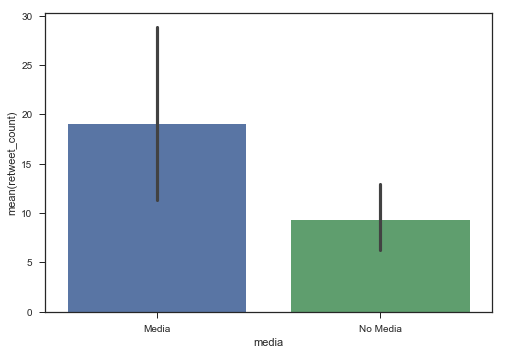

In [10]:
media_tw = tweets_df.loc[((tweets_df["entities.media"]).isnull() != True) & ((tweets_df["retweet_count"]) >0), [ "retweet_count"]]
media_tw["media"] = "Media"
no_media_tw = tweets_df.loc[((tweets_df["entities.media"]).isnull()) & ((tweets_df["retweet_count"]) >0), [ "retweet_count"]]
no_media_tw["media"] = "No Media"
sns.set_style("ticks")
ax = sns.barplot(  y = "retweet_count", x= "media", data=pd.concat([media_tw, no_media_tw])  )
plt.show()

Se nota que en promedio los tweets que tienen incluyen fotos y/o contenido multimedia reciben en promedio casi 20 Retwets, mientras los tweets sin contenido multimedia solo logran casi la mitad de Retweets.

Ahora los Tweets que comparten algún  link en su texto:

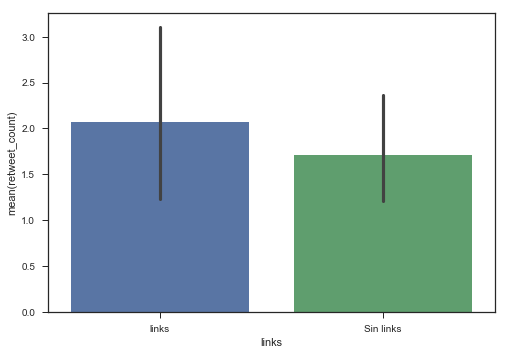

In [11]:
links_tw = tweets_df.loc[(tweets_df[ "entities.urls"]).str.len() != 0 & ((tweets_df["retweet_count"]) >0), [ "retweet_count"]]
links_tw["links"] = "links"
no_links_tw = tweets_df.loc[(tweets_df[ "entities.urls"]).str.len() == 0 & ((tweets_df["retweet_count"]) >0), [ "retweet_count"]]
no_links_tw["links"] = "Sin links"
sns.set_style("ticks")
ax = sns.barplot(y = "retweet_count", x= "links", data=pd.concat([links_tw, no_links_tw]) )
plt.show()

Parece no haber gran diferencia entre tuitear texto cuyo contenido contenga o no links o enlaces y recibir o no RT's.

Comparemos ahora la cantidad de HT en cada tweet, lo haremos con los tweet que contengan más de 1 HT con los que tengan 1 o ninguno.

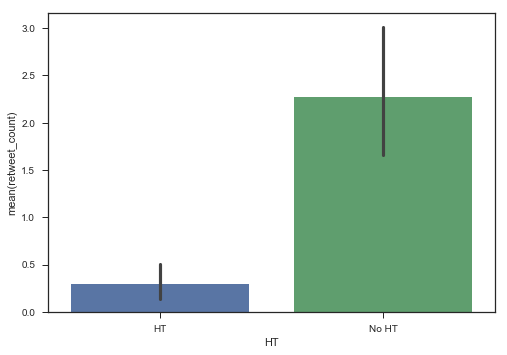

In [12]:
ht_tw = tweets_df.loc[(tweets_df[ "entities.hashtags"]).str.len() >1 & ((tweets_df["retweet_count"]) >0), [ "retweet_count"]]
ht_tw["HT"] = "HT"
no_ht_tw = tweets_df.loc[(tweets_df[ "entities.hashtags"]).str.len() <=1 & ((tweets_df["retweet_count"]) >0), [ "retweet_count"]]
no_ht_tw["HT"] = "No HT"
sns.set_style("ticks")
ax = sns.barplot(y = "retweet_count", x= "HT", data=pd.concat([ht_tw, no_ht_tw]) )
plt.show()

Parece ser que los tweets que contienen **1 ó ningun HT reciben más retweets**.

Por último revisemos ahora si el cuerpo del tweet contiene alguna mención o referencia a otros usuario (tuitero)

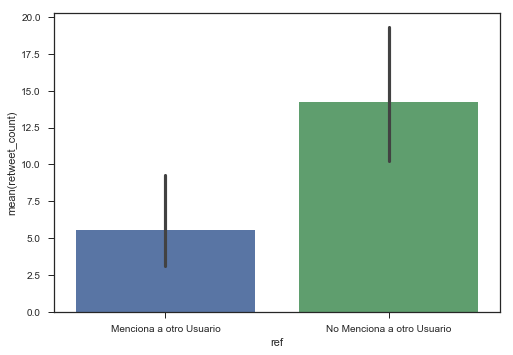

In [13]:
user_tw = tweets_df.loc[(tweets_df[ "text"]).str.contains("@") & ((tweets_df["retweet_count"]) >0), [ "retweet_count"]]
user_tw["ref"] = "Menciona a otro Usuario"
no_user_tw = tweets_df.loc[((tweets_df[ "text"]).str.contains("@") !=True) & ((tweets_df["retweet_count"]) >0), [ "retweet_count"]]
no_user_tw["ref"] = "No Menciona a otro Usuario"
sns.set_style("ticks")
ax = sns.barplot(y = "retweet_count", x= "ref", data= pd.concat([user_tw, no_user_tw]) )
plt.show()

Como se observa si el twitter no menciona a otro usuario puede recibir en promedio 15 retweets, mientras que si menciona a otro usuario ó es parte del alguna *conversación* solo recibirá en promedio 5 RT's.

Por ultimo observaremos  la relación *seguidores* vs *Retweets obtenidos*, en principio se debería esperar una relación lineal fuerte y positiva. veamos:

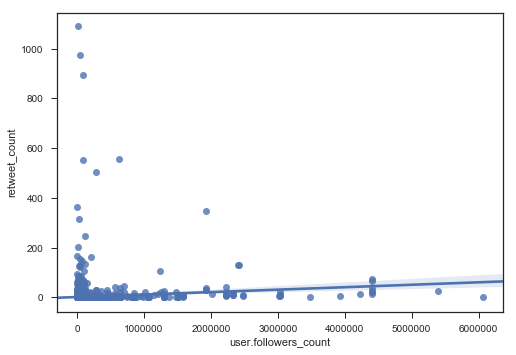

In [14]:
ax = sns.regplot(x=tweets_df["user.followers_count"],y=tweets_df["retweet_count"])
plt.show()

Según el gráfico todo indica que a mayor cantidad de seguidores más RT's sin embargo se observan alguno valores atípicos que con poco seguidores obtuvieron muchisimos RT's.

<br>
#### En resumen:
 -  La **viralidad** es un fenómeno complicado de estudiar/predecir, sin embargo pudimos obtener algunas ideas interesantes, por ejemplo los usuarios tienden a compartir ó retuitear más a los tweets con contenido multimedia agregado como imágenes, videos, gif, etc y a los tweets con pocos o ningún hashtags.
 - Algo interesante es que observamos que cuando un usuario tiene muchos seguidores obtiene más Retweets(como se puede esperar) pero no al nivel proporcional a su cantidad de seguidores, la cantidad de retweets ** no parece incrementarse** en gran medida **con la cantidad de seguidores**.
 - Tal vez si hacemos análisis de **grafos** ó **wordcloud** obtengamos mejores conclusiones, pero eso será para otra oportunidad :)